Same ID!
Same ID!
Same ID!
Same ID!
Same ID!
Same ID!
Same ID!
Same ID!


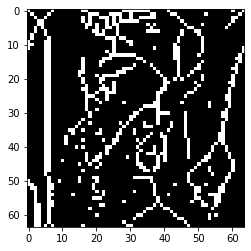

In [10]:
import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np

from utils import *

####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

#### thinning core ####
def do_thinnig():
    img_bin = img_binarize(img)
    
    row, col = (img_bin.shape)
    row, col = row // 8, col // 8
    res_final = np.zeros((row, col), np.int)
    
    for i in range(row):
        for j in range(col):
            res_final[i, j] = img_bin[8 * i, 8* j]
    
    while True:
        # use numpy copy to prevent from changing to same memory block
        
        res_old = res_final
        if id(res_old) == id(res_final):
            print('Same ID!')
            res_old = np.copy(res_final)
        
        '''
        Step1
        input : original symbolic image 
        marked-interior/border-pixel operator
        
        output : interior/border image
        '''
        res_ib = do_ib(res_final)
        
        '''
        Step2
        input : interior/border image
        pair relationship operator
        output : marked image
        '''
        res_mp = do_mp(res_ib)
        
        '''
        Step3
        input : original symbolic image +marked image
        marked-pixel connected shrink operator
        removable(by connected shrink operator on original symbolic image)
        marked(by marked image)
        delete those pixels satisfied the two conditions mentioned above
        
        output : thinned output image
        '''
        res_yokoi = do_yokoi(res_final)
        res_to_delete = (res_yokoi == 1) * 1
        
        for i in range(row):
            for j in range(col):
                if res_to_delete[i, j] == 1 and res_mp[i, j] == 1:
                    res_final[i, j] = 0
        
        '''
        compare the currently thinned image with the old one
        break if has not been changed since last iteration
        '''
        
        if np.sum(res_old == res_final) == row * col:
            break
    
    plt.imshow(res_final, cmap = 'gray')
    plt.show()
    cv2.imwrite('lena_thinned.png', res_final)

do_thinnig()